## Pairwise data analysis

In this notebook we perform Pairwise data analysis in order to find relationships between attributes. The outcome will be the predictors and the predicted value(s).

### Libraries

First we import the libraries we are going to need within this notebook.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [34]:
# Get the current notebook's directory
PROJECT_ROOT = Path(os.getcwd()).parent  # Assuming 'notebooks/' is inside the project root

# Add it to sys.path
sys.path.append(str(PROJECT_ROOT))

# Now you can import your config module
import isa_project_1.config as config

print("opening dataset...")
# here we read the respective output file where the dataset was stored 
movie_df = pd.read_csv(config.DATASETS['tmdb_5000_movies.csv'])
print("success!")

opening dataset...
success!


### Utilities

In [5]:
def one_hot_encoding(df: pd.DataFrame, column: str):
    """Generates one-hot encoding of the provided column and inserts each category as a new column.

    Prerequisities:
        column is a valid json format stored as string

    Args:
        df (pd.DataFrame): _description_
        column (str): _description_

    Returns:
        _type_: _description_
    """

    df[column] = df[column].apply(lambda x: [g['name'] for g in ast.literal_eval(x)] if isinstance(x, str) else [])
    mlb = MultiLabelBinarizer()
    genre_dummies = pd.DataFrame(mlb.fit_transform(df[column]), columns=mlb.classes_, index=df.index)
    df = pd.concat([df, genre_dummies], axis=1)
    return df

### Correlation matrix

To analyze pairwise relationships between attributes in the dataset, we first compute correlation matrix. We decided to use **the Pearson Correlation** for that. We visualize the matrix by using heatmap. This way we can identify potential relationships between attributes.

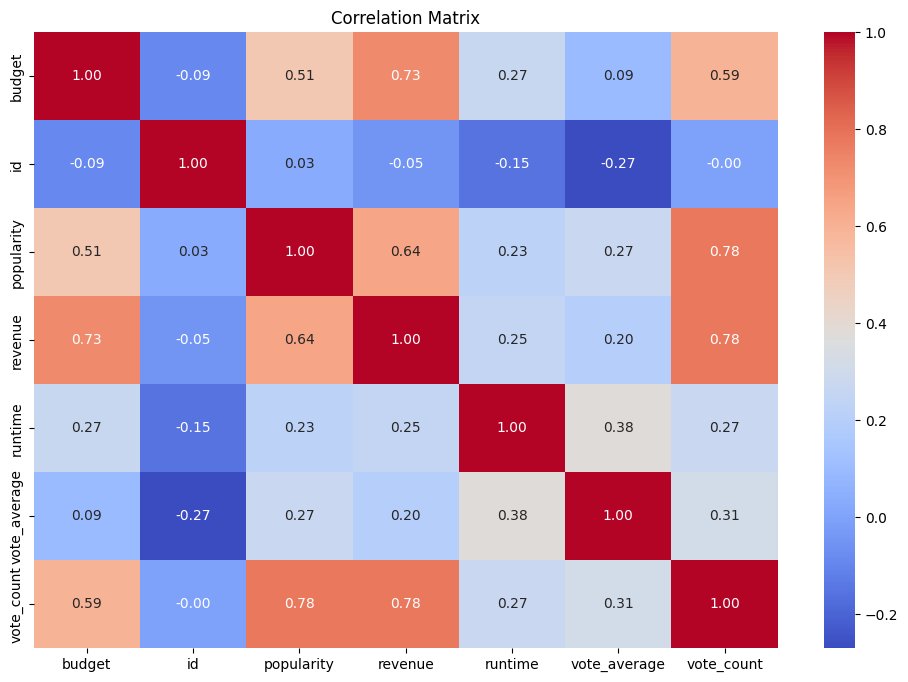

In [9]:
numeric_df = movie_df.select_dtypes(include=['number'])  # Keep only numerical columns
correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From the heat map we can see several pairwise relationships from which the most notable are:

1) *budget-revenue* (0.73 - strong positive correlation)
2) *popularity-revenue* (0.64 - moderate positive correlation)
3) *popularity-vote_count* (0.78 - strong positive correlation)
4) *revenue-vote_count*  (0.78 - strong positive correlation)
5) *budget-vote_count* (0.59 - moderate positive correlation)

#### Genre

In our previous matrix we removed all non-numerical attributes. But that can be a drastic solution as these attributes may also somehow correlate. Let's just test it out on Genre attribute.

As a solution which convets non-integer data into integers we decided to use **one-hot encoding**. By using this method new attributes are inserted into matrix and it gets huge.

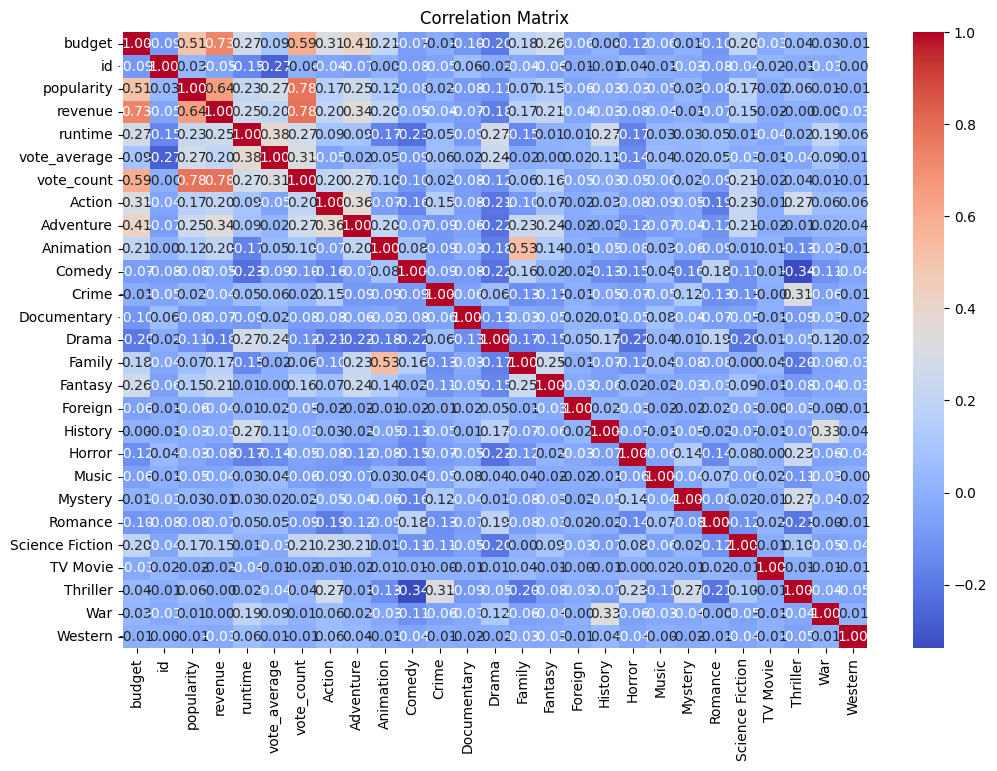

In [ ]:
# encoding genres
movie_df = one_hot_encoding(df=movie_df, column='genres')

# Keep only numerical columns
numeric_df = movie_df.select_dtypes(include=['number'])  
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

We can see that no Genre category (War, Drama, Fantasy, etc.) has any strong positive/negative correlation with any predicated attribute (budget, revenue, etc.).

### Pairwise relationships

In previous section we identified some most notable pairwise attribute relationships. Now to visualize how 2 numerical attributes relate to each other we use **scatter plots**.

#### Budget-Revenue

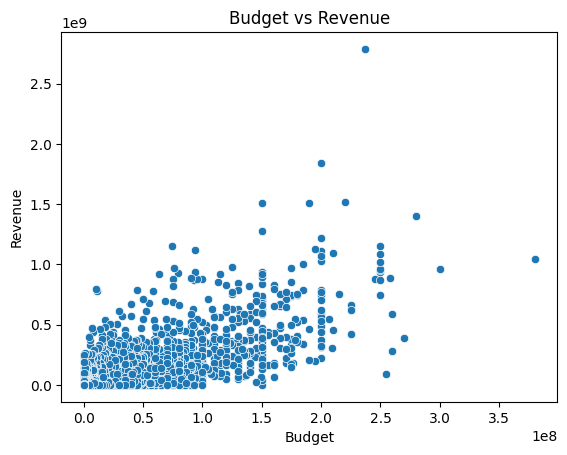

In [12]:
sns.scatterplot(x=movie_df['budget'], y=movie_df['revenue'])
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

#### Popularity-revenue

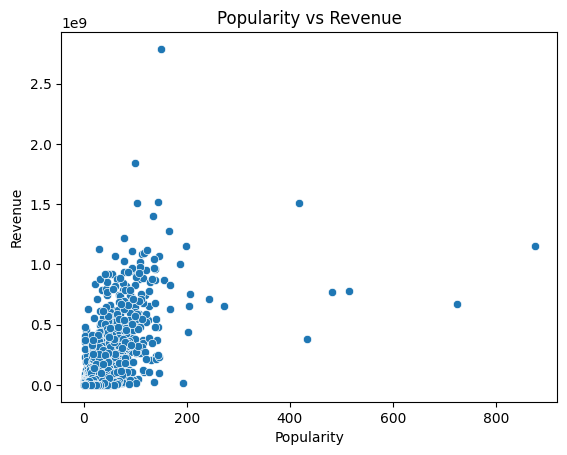

In [13]:
sns.scatterplot(x=movie_df['popularity'], y=movie_df['revenue'])
plt.title("Popularity vs Revenue")
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.show()

#### Popularity-Vote_count

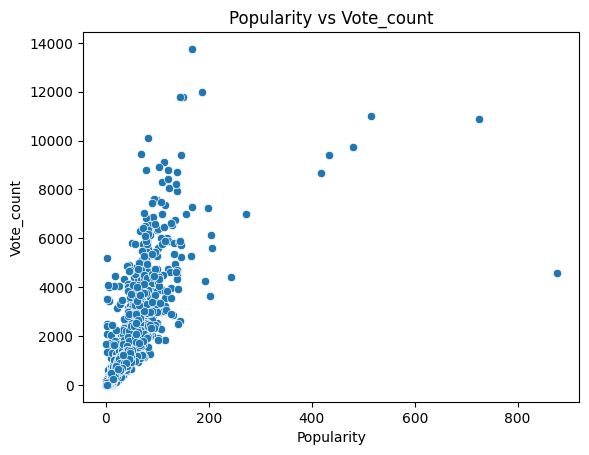

In [14]:
sns.scatterplot(x=movie_df['popularity'], y=movie_df['vote_count'])
plt.title("Popularity vs Vote_count")
plt.xlabel("Popularity")
plt.ylabel("Vote_count")
plt.show()

#### How Genres affect Revenue

In order to get a better overview on how the categorical variables affect potential predicated attributes we can use **boxplots**. Let's just try and check which genres usually generate greatest revenue. 

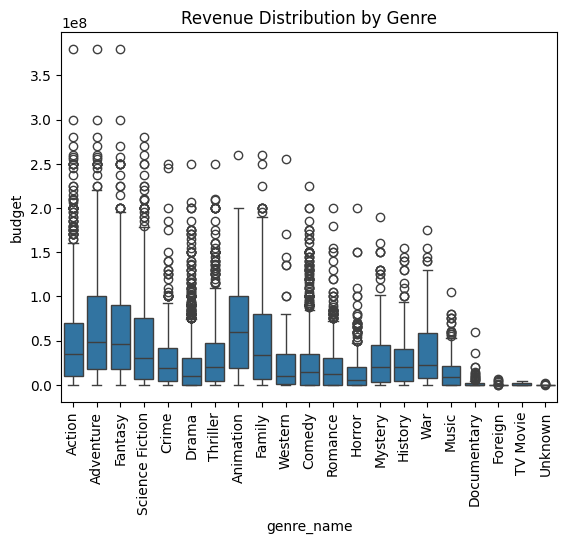

In [ ]:
# Ensure 'genres' is a list of dictionaries
movie_df['genres'] = movie_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode genres into separate rows
exploded_df = movie_df.explode('genres')

# Extract genre names correctly
exploded_df['genre_name'] = exploded_df['genres'].apply(lambda x: x['name'] if isinstance(x, dict) else "Unknown")

# Boxplot for each genre
sns.boxplot(x=exploded_df['genre_name'], y=exploded_df['revenue'])
plt.xticks(rotation=90)
plt.title("Revenue Distribution by Genre")
plt.show()

We can see that Animation, Adventure, Fantasy and Family brings greatest Revenue.

### Conclusion

By searching for pairwise relationships between individual attributes we've found several potential **predictors**. As for **predicted values** (target variables) we've decided to predict either **Revenue** or **Budget**.   